In [1]:
import torch
import numpy as np
import torch.nn.functional as F
from torch import nn
import torchvision
from torch import optim

In [2]:
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt

In [4]:
def transform():
  #return transforms.ToTensor()
  mean = [0.4766, 0.4527, 0.3926]
  std = [0.2275, 0.2224, 0.2210]
  # define transform function
  return transforms.Compose([
      transforms.Pad(25, padding_mode='symmetric'),
      transforms.RandomHorizontalFlip(), 
      transforms.RandomRotation(10),
      transforms.ToTensor(),
      transforms.Normalize(mean, std),
      transforms.RandomErasing(p=0.75,scale=(0.02, 0.1),value=1.0, inplace=False)
  ])

In [5]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transform(), 
                                             download=True)


image, label = train_dataset[0]
print(train_dataset)
print(image.size())
print(label)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: Compose(
               Pad(padding=25, fill=0, padding_mode=symmetric)
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.4766, 0.4527, 0.3926], std=[0.2275, 0.2224, 0.221])
               RandomErasing(p=0.75, scale=(0.02, 0.1), ratio=(0.3, 3.3), value=1.0, inplace=False)
           )
torch.Size([3, 82, 82])
6


In [6]:
image.permute(1, 2, 0).shape

torch.Size([82, 82, 3])

In [7]:
img_shape_size = 1
for itm in np.array(image.permute(1, 2, 0).shape):
  img_shape_size = img_shape_size * itm
img_shape_size

20172

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


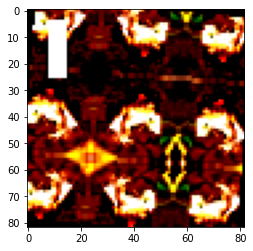

In [8]:
plt.imshow(image.permute(1, 2, 0).numpy());

In [9]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [10]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transform())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [11]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [12]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(img_shape_size, 100, 20)
net.train()

Net(
  (fc1): Linear(in_features=20172, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=20, bias=True)
)

In [13]:
3 * 82 * 82

20172

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [15]:
num_epochs = 6

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/6]. Step [1/782]. Loss: 0.047
Epoch [1/6]. Step [301/782]. Loss: 0.033
Epoch [1/6]. Step [601/782]. Loss: 0.028
Epoch [2/6]. Step [1/782]. Loss: 0.026
Epoch [2/6]. Step [301/782]. Loss: 0.026
Epoch [2/6]. Step [601/782]. Loss: 0.025
Epoch [3/6]. Step [1/782]. Loss: 0.024
Epoch [3/6]. Step [301/782]. Loss: 0.024
Epoch [3/6]. Step [601/782]. Loss: 0.024
Epoch [4/6]. Step [1/782]. Loss: 0.026
Epoch [4/6]. Step [301/782]. Loss: 0.024
Epoch [4/6]. Step [601/782]. Loss: 0.023
Epoch [5/6]. Step [1/782]. Loss: 0.020
Epoch [5/6]. Step [301/782]. Loss: 0.023
Epoch [5/6]. Step [601/782]. Loss: 0.023
Epoch [6/6]. Step [1/782]. Loss: 0.020
Epoch [6/6]. Step [301/782]. Loss: 0.022
Epoch [6/6]. Step [601/782]. Loss: 0.022
Training is finished!


## Загрузка и сохранение модели

### Сохранение модели

In [16]:
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [17]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
fc1.weight 	 torch.Size([400, 20172])
fc1.bias 	 torch.Size([400])
fc2.weight 	 torch.Size([200, 400])
fc2.bias 	 torch.Size([200])
fc3.weight 	 torch.Size([100, 200])
fc3.bias 	 torch.Size([100])
fc4.weight 	 torch.Size([20, 100])
fc4.bias 	 torch.Size([20])


In [18]:
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

### Загрузка и использование модели 

In [19]:
net = Net(img_shape_size, 100, 20)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=20172, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=20, bias=True)
)

In [20]:
net = torch.load(PATH_MODEL)

In [21]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  cat ship ship plane frog frog car frog


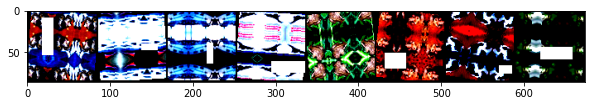

In [22]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [23]:
print(outputs)

tensor([[ 3.4364,  3.5395,  3.4550,  4.8979,  2.7676,  4.2335,  3.7395, -0.0431,
          4.1074,  1.2850, -3.3627, -2.6735, -3.7984, -2.7015, -3.5767, -3.4663,
         -2.3096, -3.1434, -2.8881, -2.9785],
        [ 6.8120,  7.8682,  2.3400,  2.8472,  3.9406,  1.2596,  0.8975,  0.8309,
         12.3649,  7.0454, -4.3183, -4.6225, -4.5167, -4.2128, -4.7992, -4.7899,
         -3.7999, -4.5024, -3.4950, -5.2331],
        [ 6.6983,  5.7931,  2.8993,  1.1558,  2.8186,  0.2102, -1.4448,  1.2176,
          8.7536,  4.5007, -3.5601, -3.4932, -3.4149, -3.6176, -3.4755, -3.5816,
         -2.4411, -3.2468, -3.3314, -4.1499],
        [ 5.8467,  3.0401,  3.9586,  2.7472,  4.7737,  1.4880,  0.5317,  2.5478,
          8.8488,  1.5280, -3.8308, -3.8065, -3.7178, -3.4386, -3.9395, -3.5635,
         -2.9896, -3.8977, -3.2520, -3.5995],
        [ 1.4241,  1.5101,  4.2578,  3.2768,  6.6123,  3.9647,  6.0818,  1.5029,
          2.7093,  0.4922, -2.7497, -3.0255, -3.0002, -2.2142, -3.4626, -3.1669,
      

In [24]:
net.predict(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[7.3289e-02, 8.1247e-02, 7.4662e-02, 3.1605e-01, 3.7549e-02, 1.6263e-01,
         9.9236e-02, 2.2591e-03, 1.4337e-01, 8.5252e-03, 8.1703e-05, 1.6275e-04,
         5.2843e-05, 1.5826e-04, 6.5959e-05, 7.3658e-05, 2.3420e-04, 1.0173e-04,
         1.3132e-04, 1.1997e-04],
        [3.7990e-03, 1.0924e-02, 4.3402e-05, 7.2073e-05, 2.1510e-04, 1.4733e-05,
         1.0258e-05, 9.5968e-06, 9.8011e-01, 4.7976e-03, 5.5702e-08, 4.1089e-08,
         4.5676e-08, 6.1896e-08, 3.4436e-08, 3.4755e-08, 9.3537e-08, 4.6332e-08,
         1.2688e-07, 2.2313e-08],
        [1.0663e-01, 4.3129e-02, 2.3879e-03, 4.1765e-04, 2.2028e-03, 1.6224e-04,
         3.1002e-05, 4.4428e-04, 8.3271e-01, 1.1843e-02, 3.7386e-06, 3.9975e-06,
         4.3230e-06, 3.5298e-06, 4.0686e-06, 3.6593e-06, 1.1447e-05, 5.1143e-06,
         4.6996e-06, 2.0730e-06],
        [4.5880e-02, 2.7716e-03, 6.9442e-03, 2.0679e-03, 1.5690e-02, 5.8704e-04,
         2.2561e-04, 1.6941e-03, 9.2349e-01, 6.1098e-04, 2.8759e-06, 2.9465e-06,
       

In [25]:
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 8, 8, 8, 4, 6, 3, 6])

In [26]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  cat ship ship ship deer frog cat frog


In [27]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'ship' 'ship' 'ship' 'deer' 'frog' 'cat' 'frog']
Accuracy is 0.625


# Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru